# Adenocarcinoma Training Data Visualization

This notebook visualizes the adenocarcinoma training dataset with spatial cluster labels overlaid on the tissue image using color-coded Leiden clusters.

**Dataset**: `training_data/WSI_patch_embeddings_centered-224_adenocarcinoma_leiden_0.3_training-data.csv`  
**Image**: `spatial_adenocarcinoma/tissue_lowres_image.png`  
**Visualization**: Color-coded patches showing spatial distribution of Leiden clusters

## Import Libraries and Load Data

Import required libraries and load the adenocarcinoma training dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Add current directory to path for importing plotter
sys.path.append('/home/me/bio/bioInfoLab/main')
from plotter import visualize_tissue_image_with_samples_color_labels

print("Libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")

Libraries imported successfully!
Current working directory: /home/me/bio/bioInfoLab/main


In [2]:
# Load the adenocarcinoma training data
data_path = "training_data/WSI_patch_embeddings_centered-224_adenocarcinoma_leiden_0.3_training-data.csv"
image_path = "spatial_adenocarcinoma/tissue_lowres_image.png"

print(f"Loading data from: {data_path}")
print(f"Using tissue image: {image_path}")

# Check if files exist
if not os.path.exists(data_path):
    print(f"❌ Data file not found: {data_path}")
    if os.path.exists("training_data/"):
        print("Available files in training_data/:")
        for file in os.listdir("training_data/"):
            print(f"  - {file}")
else:
    print(f"✓ Data file found")

if not os.path.exists(image_path):
    print(f"❌ Image file not found: {image_path}")
    if os.path.exists("spatial_adenocarcinoma/"):
        print("Available files in spatial_adenocarcinoma/:")
        for file in os.listdir("spatial_adenocarcinoma/"):
            print(f"  - {file}")
else:
    print(f"✓ Image file found")

# Load the dataset
df_adenocarcinoma = pd.read_csv(data_path)

print(f"\n=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df_adenocarcinoma.shape}")
print(f"Columns: {list(df_adenocarcinoma.columns)[:10]}...")  # Show first 10 columns
print(f"Required columns present: {all(col in df_adenocarcinoma.columns for col in ['Patch_X', 'Patch_Y', 'label'])}")

Loading data from: training_data/WSI_patch_embeddings_centered-224_adenocarcinoma_leiden_0.3_training-data.csv
Using tissue image: spatial_adenocarcinoma/tissue_lowres_image.png
✓ Data file found
✓ Image file found

=== DATASET OVERVIEW ===
Dataset shape: (4371, 1539)
Columns: ['Patch_X', 'Patch_Y', '0', '1', '2', '3', '4', '5', '6', '7']...
Required columns present: True


## Analyze Cluster Distribution

Examine the cluster labels and spatial distribution in the adenocarcinoma dataset.

In [3]:
# Analyze cluster distribution
print("=== ADENOCARCINOMA CLUSTER ANALYSIS ===")

# Get cluster information
label_counts = df_adenocarcinoma['label'].value_counts().sort_index()
unique_labels = sorted(df_adenocarcinoma['label'].unique())

print(f"Number of clusters: {len(unique_labels)}")
print(f"Cluster labels: {unique_labels}")
print(f"Total patches: {len(df_adenocarcinoma):,}")

print(f"\n=== CLUSTER DISTRIBUTION ===")
for label in unique_labels:
    count = label_counts[label]
    percentage = (count / len(df_adenocarcinoma)) * 100
    print(f"Cluster {label}: {count:,} patches ({percentage:.1f}%)")

# Spatial coordinate analysis
print(f"\n=== SPATIAL COORDINATES ===")
x_min, x_max = df_adenocarcinoma['Patch_X'].min(), df_adenocarcinoma['Patch_X'].max()
y_min, y_max = df_adenocarcinoma['Patch_Y'].min(), df_adenocarcinoma['Patch_Y'].max()

print(f"X coordinates: {x_min} to {x_max}")
print(f"Y coordinates: {y_min} to {y_max}")

# Calculate tissue dimensions (add patch size to max coordinates)
tissue_width = x_max + 224
tissue_height = y_max + 224

print(f"Estimated tissue dimensions: {tissue_width} x {tissue_height} pixels")
print(f"Patch size: 224 x 224 pixels")

=== ADENOCARCINOMA CLUSTER ANALYSIS ===
Number of clusters: 7
Cluster labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Total patches: 4,371

=== CLUSTER DISTRIBUTION ===
Cluster 0: 1,229 patches (28.1%)
Cluster 1: 925 patches (21.2%)
Cluster 2: 900 patches (20.6%)
Cluster 3: 666 patches (15.2%)
Cluster 4: 356 patches (8.1%)
Cluster 5: 261 patches (6.0%)
Cluster 6: 34 patches (0.8%)

=== SPATIAL COORDINATES ===
X coordinates: 5076 to 23529
Y coordinates: 3839 to 23287
Estimated tissue dimensions: 23753 x 23511 pixels
Patch size: 224 x 224 pixels


## Create Spatial Visualization

Generate the main visualization using the plotter function to show adenocarcinoma tissue with color-coded cluster labels.

=== CREATING ADENOCARCINOMA SPATIAL VISUALIZATION ===
Visualization parameters:
  Data: 4,371 patches
  Clusters: 7 Leiden clusters

Generating visualization...


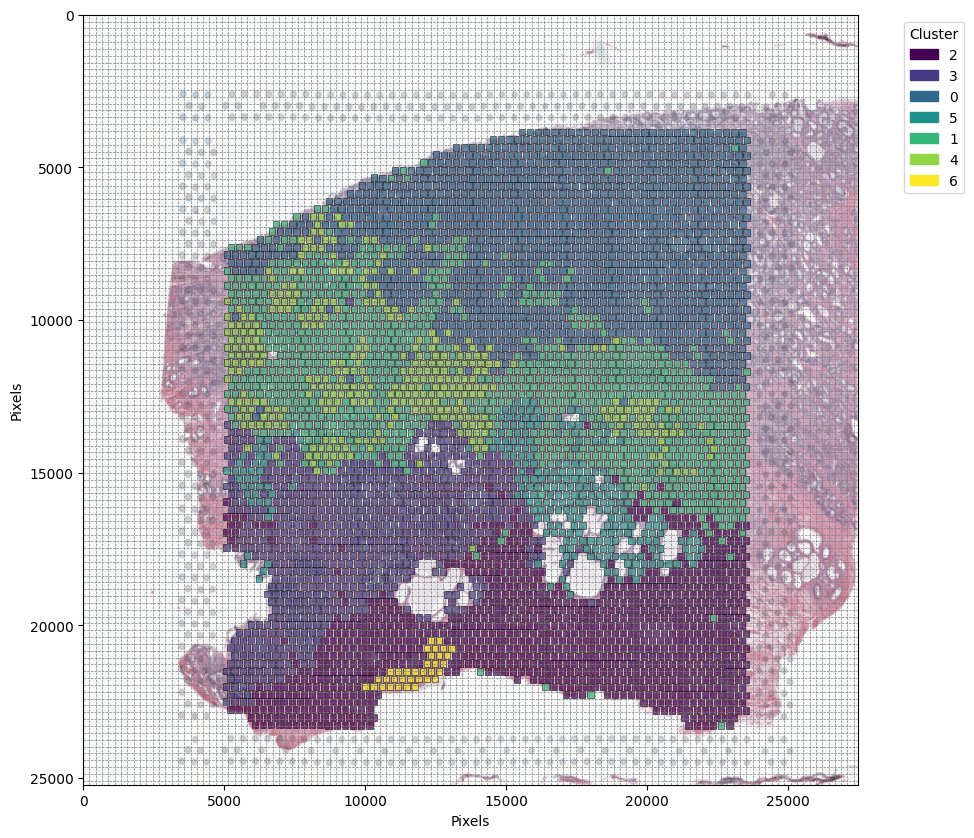

✓ Adenocarcinoma spatial visualization completed!
Each color represents a different Leiden cluster (resolution 0.3)
Rectangles show 224x224 pixel patches with their cluster assignments


In [4]:
# Create the spatial visualization with color-coded clusters
print("=== CREATING ADENOCARCINOMA SPATIAL VISUALIZATION ===")

print(f"Visualization parameters:")
print(f"  Data: {len(df_adenocarcinoma):,} patches")
print(f"  Clusters: {len(unique_labels)} Leiden clusters")

print(f"\nGenerating visualization...")

# Use the plotter function to create the visualization
visualize_tissue_image_with_samples_color_labels(
    image_path=image_path,
    data=df_adenocarcinoma,
    width=27482,
    height=25219
)

print(f"✓ Adenocarcinoma spatial visualization completed!")
print(f"Each color represents a different Leiden cluster (resolution 0.3)")
print(f"Rectangles show 224x224 pixel patches with their cluster assignments")

## Save High-Resolution Version

Create and save a high-resolution version of the visualization for publication or detailed analysis.

In [5]:
# Save high-resolution version
print("=== SAVING HIGH-RESOLUTION VISUALIZATION ===")

# Create output directory
output_dir = "results/visualizations"
os.makedirs(output_dir, exist_ok=True)

# Generate output filename
output_path = f"{output_dir}/adenocarcinoma_clusters_spatial_visualization.png"

print(f"Saving high-resolution visualization to: {output_path}")

# Create the visualization and save it
visualize_tissue_image_with_samples_color_labels(
    image_path=image_path,
    data=df_adenocarcinoma,
    width=27482,
    height=25219,
    output_path=output_path
)

print(f"✓ High-resolution visualization saved!")
print(f"File location: {output_path}")
print(f"Image resolution: 300 DPI")

=== SAVING HIGH-RESOLUTION VISUALIZATION ===
Saving high-resolution visualization to: results/visualizations/adenocarcinoma_clusters_spatial_visualization.png
✓ High-resolution visualization saved!
File location: results/visualizations/adenocarcinoma_clusters_spatial_visualization.png
Image resolution: 300 DPI


# Adenocarcinoma Training Data Visualization

This notebook visualizes the adenocarcinoma training dataset with spatial cluster labels overlaid on the tissue image using color-coded Leiden clusters.

**Dataset**: `training_data/WSI_patch_embeddings_standard-224_adenocarcinoma_leiden_0.3_training-data.csv`  
**Same Image**: `spatial_adenocarcinoma/tissue_lowres_image.png`  
**Purpose**: Compare spatial patterns between centered vs standard embeddings

## Import Libraries and Load Data

Import required libraries and load the adenocarcinoma training dataset.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Add current directory to path for importing plotter
sys.path.append('/home/me/bio/bioInfoLab/main')
from plotter_standard import visualize_tissue_image_with_samples_color_labels

print("Libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")

Libraries imported successfully!
Current working directory: /home/me/bio/bioInfoLab/main


In [7]:
# Load the adenocarcinoma training data
data_path_standard = "training_data/WSI_patch_embeddings_standard-448_adenocarcinoma_leiden_0.3_training-data.csv"
image_path = "spatial_adenocarcinoma/tissue_lowres_image.png"

print(f"Loading standard adenocarcinoma data from: {data_path_standard}")

# Check if standard dataset file exists
if not os.path.exists(data_path_standard):
    print(f"❌ Standard dataset file not found: {data_path_standard}")
    if os.path.exists("training_data/"):
        print("Available files in training_data/:")
        for file in os.listdir("training_data/"):
            if "adenocarcinoma" in file:
                print(f"  - {file}")
else:
    print(f"✓ Standard dataset file found")

# Load the standard dataset
df_adenocarcinoma_standard = pd.read_csv(data_path_standard)

print(f"\n=== STANDARD DATASET OVERVIEW ===")
print(f"Dataset shape: {df_adenocarcinoma_standard.shape}")
print(f"Columns: {list(df_adenocarcinoma_standard.columns)[:10]}...")  # Show first 10 columns
print(f"Required columns present: {all(col in df_adenocarcinoma_standard.columns for col in ['Patch_X', 'Patch_Y', 'label'])}")

# Compare with centered dataset
print(f"\n=== COMPARISON WITH CENTERED DATASET ===")
print(f"Centered dataset patches: {len(df_adenocarcinoma):,}")
print(f"Standard dataset patches: {len(df_adenocarcinoma_standard):,}")
print(f"Same number of patches: {len(df_adenocarcinoma) == len(df_adenocarcinoma_standard)}")

Loading standard adenocarcinoma data from: training_data/WSI_patch_embeddings_standard-448_adenocarcinoma_leiden_0.3_training-data.csv
✓ Standard dataset file found

=== STANDARD DATASET OVERVIEW ===
Dataset shape: (1644, 1540)
Columns: ['Patch_X', 'Patch_Y', '0', '1', '2', '3', '4', '5', '6', '7']...
Required columns present: True

=== COMPARISON WITH CENTERED DATASET ===
Centered dataset patches: 4,371
Standard dataset patches: 1,644
Same number of patches: False


In [8]:
# Analyze standard dataset cluster distribution
print("=== STANDARD ADENOCARCINOMA CLUSTER ANALYSIS ===")

# Get cluster information for standard dataset
label_counts_standard = df_adenocarcinoma_standard['label'].value_counts().sort_index()
unique_labels_standard = sorted(df_adenocarcinoma_standard['label'].unique())

print(f"Number of clusters: {len(unique_labels_standard)}")
print(f"Cluster labels: {unique_labels_standard}")
print(f"Total patches: {len(df_adenocarcinoma_standard):,}")

print(f"\n=== STANDARD CLUSTER DISTRIBUTION ===")
for label in unique_labels_standard:
    count = label_counts_standard[label]
    percentage = (count / len(df_adenocarcinoma_standard)) * 100
    print(f"Cluster {label}: {count:,} patches ({percentage:.1f}%)")

# Spatial coordinate analysis for standard dataset
print(f"\n=== STANDARD SPATIAL COORDINATES ===")
x_min_std, x_max_std = df_adenocarcinoma_standard['Patch_X'].min(), df_adenocarcinoma_standard['Patch_X'].max()
y_min_std, y_max_std = df_adenocarcinoma_standard['Patch_Y'].min(), df_adenocarcinoma_standard['Patch_Y'].max()

print(f"X coordinates: {x_min_std} to {x_max_std}")
print(f"Y coordinates: {y_min_std} to {y_max_std}")

# Calculate tissue dimensions for standard dataset
tissue_width_standard = x_max_std + 224
tissue_height_standard = y_max_std + 224

print(f"Estimated tissue dimensions: {tissue_width_standard} x {tissue_height_standard} pixels")
print(f"Patch size: 224 x 224 pixels")

# Compare spatial coverage with centered dataset
print(f"\n=== SPATIAL COVERAGE COMPARISON ===")
print(f"Centered dataset coordinates: X({df_adenocarcinoma['Patch_X'].min()}-{df_adenocarcinoma['Patch_X'].max()}), Y({df_adenocarcinoma['Patch_Y'].min()}-{df_adenocarcinoma['Patch_Y'].max()})")
print(f"Standard dataset coordinates: X({x_min_std}-{x_max_std}), Y({y_min_std}-{y_max_std})")
print(f"Same spatial coverage: {(x_min_std == df_adenocarcinoma['Patch_X'].min() and x_max_std == df_adenocarcinoma['Patch_X'].max())}")

=== STANDARD ADENOCARCINOMA CLUSTER ANALYSIS ===
Number of clusters: 7
Cluster labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Total patches: 1,644

=== STANDARD CLUSTER DISTRIBUTION ===
Cluster 0: 457 patches (27.8%)
Cluster 1: 338 patches (20.6%)
Cluster 2: 341 patches (20.7%)
Cluster 3: 258 patches (15.7%)
Cluster 4: 135 patches (8.2%)
Cluster 5: 99 patches (6.0%)
Cluster 6: 16 patches (1.0%)

=== STANDARD SPATIAL COORDINATES ===
X coordinates: 4928 to 23296
Y coordinates: 3584 to 23296
Estimated tissue dimensions: 23520 x 23520 pixels
Patch size: 224 x 224 pixels

=== SPATIAL COVERAGE COMPARISON ===
Centered dataset coordinates: X(5076-23529), Y(3839-23287)
Standard dataset coordinates: X(4928-23296), Y(3584-23296)
Same spatial coverage: False


## Create Spatial Visualization

Generate the main visualization using the plotter function to show adenocarcinoma tissue with color-coded Leiden clusters.

=== CREATING STANDARD ADENOCARCINOMA SPATIAL VISUALIZATION ===
Standard dataset visualization parameters:
  Data: 1,644 patches
  Clusters: 7 Leiden clusters
  Tissue size: 23520 x 23520 pixels
  Image overlay: spatial_adenocarcinoma/tissue_lowres_image.png

Generating standard dataset visualization...


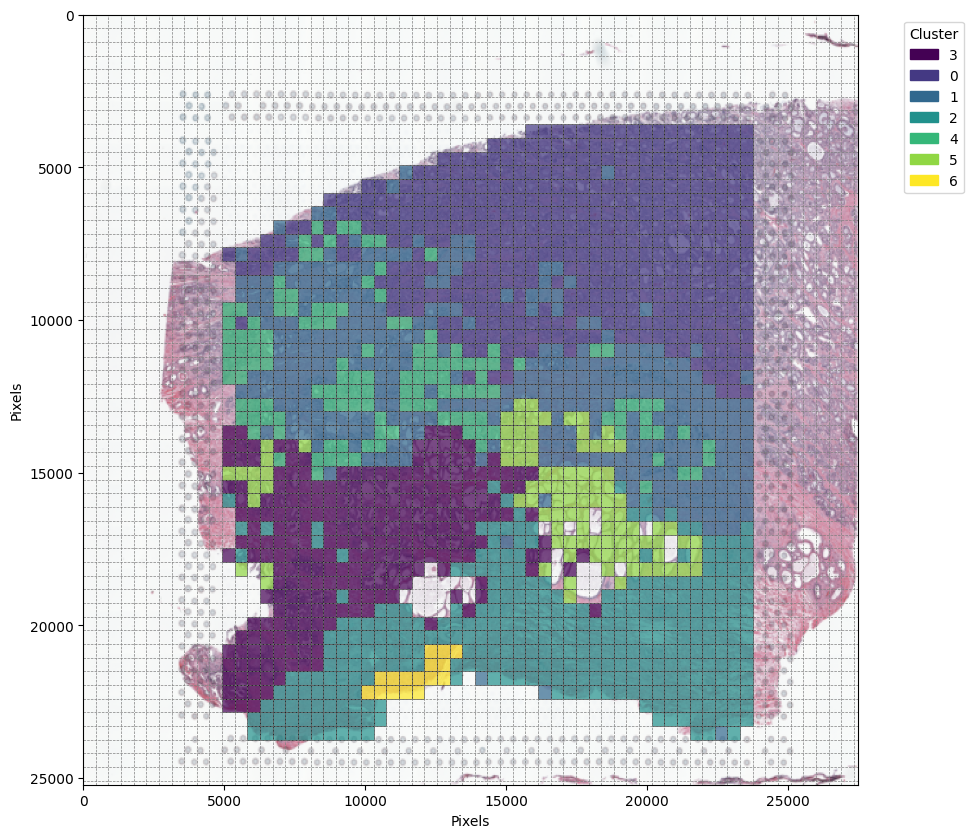

✓ Standard adenocarcinoma spatial visualization completed!
Each color represents a different Leiden cluster (resolution 0.3)
This shows the standard (non-centered) embedding cluster patterns


In [9]:
# Create the spatial visualization for standard dataset
print("=== CREATING STANDARD ADENOCARCINOMA SPATIAL VISUALIZATION ===")

print(f"Standard dataset visualization parameters:")
print(f"  Data: {len(df_adenocarcinoma_standard):,} patches")
print(f"  Clusters: {len(unique_labels_standard)} Leiden clusters")
print(f"  Tissue size: {tissue_width_standard} x {tissue_height_standard} pixels")
print(f"  Image overlay: {image_path}")

print(f"\nGenerating standard dataset visualization...")

# Use the plotter function to create the visualization for standard dataset
visualize_tissue_image_with_samples_color_labels(
    image_path=image_path,
    data=df_adenocarcinoma_standard,
    width=27482,
    height=25219
)

print(f"✓ Standard adenocarcinoma spatial visualization completed!")
print(f"Each color represents a different Leiden cluster (resolution 0.3)")
print(f"This shows the standard (non-centered) embedding cluster patterns")

=== SAVING STANDARD DATASET HIGH-RESOLUTION VISUALIZATION ===
Saving standard dataset high-resolution visualization to: results/visualizations/adenocarcinoma_standard_clusters_spatial_visualization.png


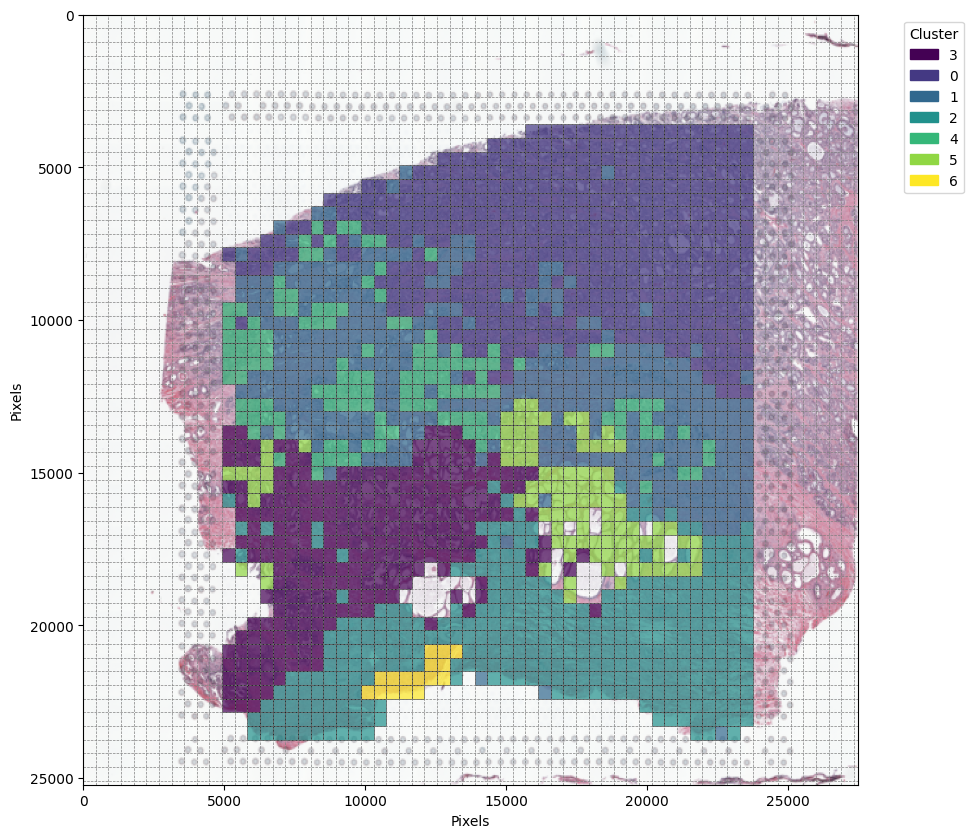

✓ Standard dataset high-resolution visualization saved!
File location: results/visualizations/adenocarcinoma_standard_clusters_spatial_visualization.png
Image resolution: 300 DPI


In [10]:
# Save high-resolution version of standard dataset visualization
print("=== SAVING STANDARD DATASET HIGH-RESOLUTION VISUALIZATION ===")

# Generate output filename for standard dataset
output_path_standard = f"{output_dir}/adenocarcinoma_standard_clusters_spatial_visualization.png"

print(f"Saving standard dataset high-resolution visualization to: {output_path_standard}")

# Create the visualization and save it
visualize_tissue_image_with_samples_color_labels(
    image_path=image_path,
    data=df_adenocarcinoma_standard,
    width=27482,
    height=25219
)

print(f"✓ Standard dataset high-resolution visualization saved!")
print(f"File location: {output_path_standard}")
print(f"Image resolution: 300 DPI")